In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import ast
import progressbar
import os

In [9]:
actors = pd.read_pickle("./data/actors.pkl")
movies = pd.read_pickle("./data/movies.pkl").set_index('IMDb_ID')

In [10]:
actors

Info                                        \
                              ordering Wikipedia movie ID         Movie name   
      IMDb_ID   IMDb_actor_ID                                                  
0     tt0228333 nm0000449            1             975900     Ghosts of Mars   
1     tt0114508 nm0000449            1             689763            Species   
2     tt0120841 nm0000449            1             704406         Species II   
3     tt0129884 nm0000449            1             761361           Dog Park   
4     tt0244196 nm0000449            1             355807        Second Skin   
...                                ...                ...                ...   
27611 tt0120514 nm0000410            1            1191380              Wilde   
27612 tt0100666 nm0056492            1            7761830    Spaced Invaders   
27613 tt0048223 nm0827409            1           28373912          Jan Zizka   
27614 tt1606259 nm4774206            1           34980460            Knuckle   
27615 tt0362411 nm0514648            1            9971909  Another Nice Mess   

                                                                        \
                              Movie release date           primaryName   
      IMDb_ID   IMDb_actor_ID                                            
0     tt0228333 nm0000449                   2001    Natasha Henstridge   
1     tt0114508 nm0000449                   1995    Natasha Henstridge   
2     tt0120841 nm0000449                   1998    Natasha Henstridge   
3     tt0129884 nm0000449                   1998    Natasha Henstridge   
4     tt0244196 nm0000449                   2000    Natasha Henstridge   
...                                          ...                   ...   
27611 tt0120514 nm0000410                   1997           Stephen Fry   
27612 tt0100666 nm0056492                   1990          Douglas Barr   
27613 tt0048223 nm0827409                   1956       Zdenek Stepánek   
27614 tt1606259 nm4774206                   2011  James Quinn McDonagh   
27615 tt0362411 nm0514648                   1972           Rich Little   

                               Features                                 \
                              birthYear awards nominations movie_count   
      IMDb_ID   IMDb_actor_ID                                            
0     tt0228333 nm0000449          1974      0           0           5   
1     tt0114508 nm0000449          1974      0           0           1   
2     tt0120841 nm0000449          1974      0           0           3   
3     tt0129884 nm0000449          1974      0           0           3   
4     tt0244196 nm0000449          1974      0           0           4   
...                                 ...    ...         ...         ...   
27611 tt0120514 nm0000410          1957      0           0           1   
27612 tt0100666 nm0056492          1949      0           0           1   
27613 tt0048223 nm0827409          1896      0           0           1   
27614 tt1606259 nm4774206            \N      0           0           1   
27615 tt0362411 nm0514648          1938      0           0           1   

                                                                  \
                              movie_count_genre genres_b4 isMale   
      IMDb_ID   IMDb_actor_ID                                      
0     tt0228333 nm0000449                     3        17      0   
1     tt0114508 nm0000449                     1         2      0   
2     tt0120841 nm0000449                     2         5      0   
3     tt0129884 nm0000449                     2         5      0   
4     tt0244196 nm0000449                     3        10      0   
...                                         ...       ...    ...   
27611 tt0120514 nm0000410                     0        11      1   
27612 tt0100666 nm0056492                     0         3      1   
27613 tt0048223 nm0827409                     1         9   <NA>   
27614 tt1606259 nm47742

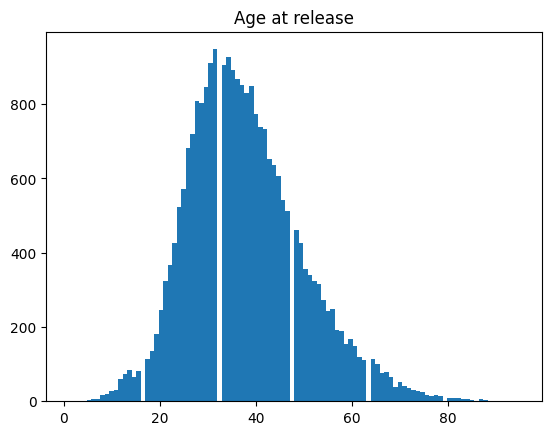

In [11]:
plt.hist(actors['Features']['age_at_release'].dropna(), bins=100)

plt.title('Age at release')
plt.show()




In [12]:
actors

Info                                        \
                              ordering Wikipedia movie ID         Movie name   
      IMDb_ID   IMDb_actor_ID                                                  
0     tt0228333 nm0000449            1             975900     Ghosts of Mars   
1     tt0114508 nm0000449            1             689763            Species   
2     tt0120841 nm0000449            1             704406         Species II   
3     tt0129884 nm0000449            1             761361           Dog Park   
4     tt0244196 nm0000449            1             355807        Second Skin   
...                                ...                ...                ...   
27611 tt0120514 nm0000410            1            1191380              Wilde   
27612 tt0100666 nm0056492            1            7761830    Spaced Invaders   
27613 tt0048223 nm0827409            1           28373912          Jan Zizka   
27614 tt1606259 nm4774206            1           34980460            Knuckle   
27615 tt0362411 nm0514648            1            9971909  Another Nice Mess   

                                                                        \
                              Movie release date           primaryName   
      IMDb_ID   IMDb_actor_ID                                            
0     tt0228333 nm0000449                   2001    Natasha Henstridge   
1     tt0114508 nm0000449                   1995    Natasha Henstridge   
2     tt0120841 nm0000449                   1998    Natasha Henstridge   
3     tt0129884 nm0000449                   1998    Natasha Henstridge   
4     tt0244196 nm0000449                   2000    Natasha Henstridge   
...                                          ...                   ...   
27611 tt0120514 nm0000410                   1997           Stephen Fry   
27612 tt0100666 nm0056492                   1990          Douglas Barr   
27613 tt0048223 nm0827409                   1956       Zdenek Stepánek   
27614 tt1606259 nm4774206                   2011  James Quinn McDonagh   
27615 tt0362411 nm0514648                   1972           Rich Little   

                               Features                                 \
                              birthYear awards nominations movie_count   
      IMDb_ID   IMDb_actor_ID                                            
0     tt0228333 nm0000449          1974      0           0           5   
1     tt0114508 nm0000449          1974      0           0           1   
2     tt0120841 nm0000449          1974      0           0           3   
3     tt0129884 nm0000449          1974      0           0           3   
4     tt0244196 nm0000449          1974      0           0           4   
...                                 ...    ...         ...         ...   
27611 tt0120514 nm0000410          1957      0           0           1   
27612 tt0100666 nm0056492          1949      0           0           1   
27613 tt0048223 nm0827409          1896      0           0           1   
27614 tt1606259 nm4774206            \N      0           0           1   
27615 tt0362411 nm0514648          1938      0           0           1   

                                                                  \
                              movie_count_genre genres_b4 isMale   
      IMDb_ID   IMDb_actor_ID                                      
0     tt0228333 nm0000449                     3        17      0   
1     tt0114508 nm0000449                     1         2      0   
2     tt0120841 nm0000449                     2         5      0   
3     tt0129884 nm0000449                     2         5      0   
4     tt0244196 nm0000449                     3        10      0   
...                                         ...       ...    ...   
27611 tt0120514 nm0000410                     0        11      1   
27612 tt0100666 nm0056492                     0         3      1   
27613 tt0048223 nm0827409                     1         9   <NA>   
27614 tt1606259 nm47742

Text(0.5, 1.0, 'Movie count in drama')

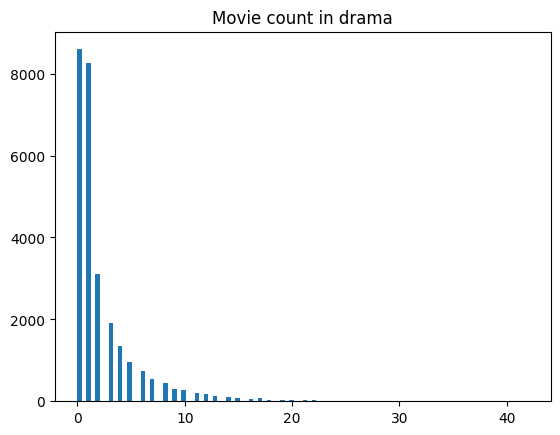

In [13]:
plt.hist(actors['Features']['movie_count_genre'].dropna(), bins=100)

plt.title('Movie count in drama')

Text(0.5, 1.0, 'Number of nominations')

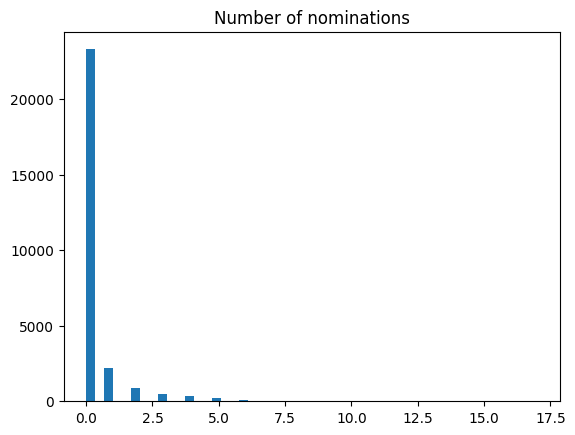

In [14]:


plt.hist(actors['Features']['nominations'].dropna(), bins=50)

plt.title('Number of nominations')

Text(0.5, 1.0, 'Number of awards')

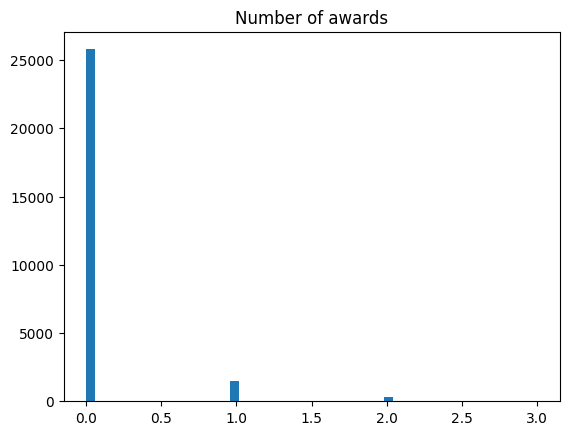

In [15]:
plt.hist(actors['Features']['awards'].dropna(), bins=50)

plt.title('Number of awards')

Text(0.5, 1.0, 'Diversity of genres')

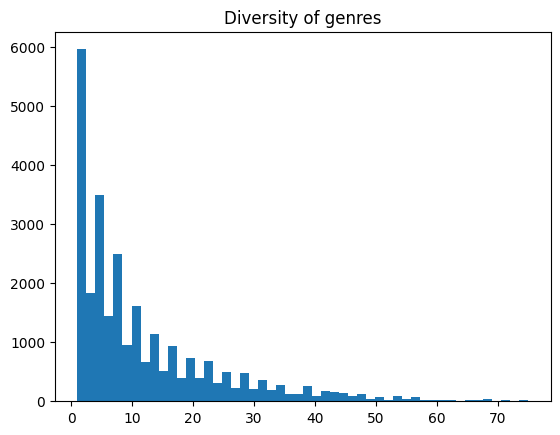

In [16]:
plt.hist(actors['Features']['genres_b4'].dropna(), bins=50)
plt.title('Diversity of genres')

Text(0.5, 1.0, 'Male')

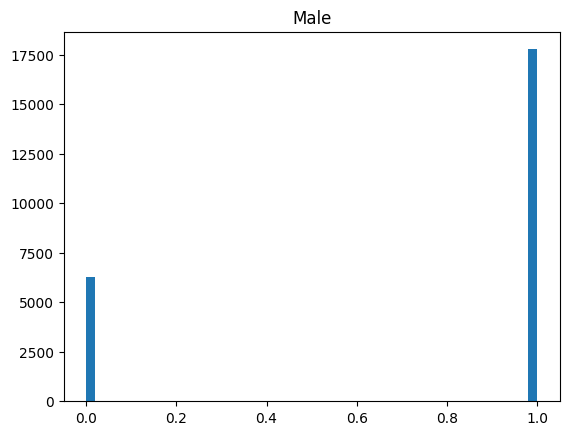

In [17]:
plt.hist(actors['Features']['isMale'].dropna(), bins=50)

plt.title('Male')

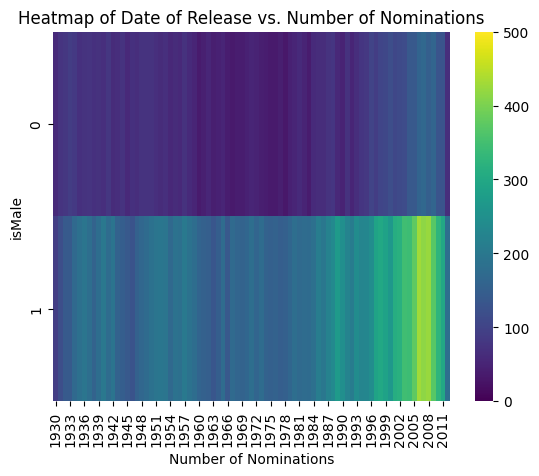

In [18]:

#data = actors.loc[:, ['age_at_release', 'movie_count']]

#sns.histplot(data = data, x='year', y='features', bins=(20, 20), cmap='viridis', cbar=True)
data = actors[['Info', 'Features']].dropna()

date_of_release = data['Info']['Movie release date']
number_of_nominations = data['Features']['isMale']

heatmap_data = data.pivot_table(index=number_of_nominations, columns=date_of_release, aggfunc='size', fill_value=0)
sns.heatmap(heatmap_data, cmap='viridis', annot=False, fmt='g', cbar=True, vmin=0, vmax=500)
plt.title('Heatmap of Date of Release vs. Number of Nominations')
plt.xlabel('Number of Nominations')
plt.show()


<Axes: xlabel='ReleaseYearRange'>

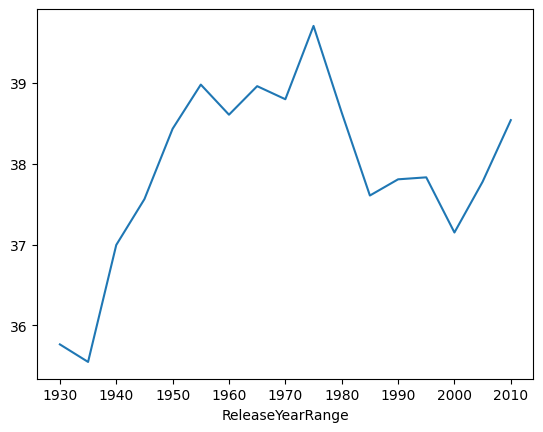

In [19]:
#mode_per_date = actors['Features']['age_at_release'].groupby(actors['Info']['Movie release date']).apply(lambda x: x.mode().iloc[0])
#mode_per_date.plot()

actors['ReleaseYearRange'] = (actors['Info']['Movie release date'] // 5) * 5


#mean_per_date = actors['Features']['age_at_release'].groupby(actors['Info']['Movie release date']).mean()
mean_per_date = actors['Features']['age_at_release'].groupby(actors['ReleaseYearRange']).mean()
mean_per_date.plot()


In [20]:
actors.reset_index(level=0)

level_0     Info                     \
                                ordering Wikipedia movie ID   
IMDb_ID   IMDb_actor_ID                                       
tt0228333 nm0000449           0        1             975900   
tt0114508 nm0000449           1        1             689763   
tt0120841 nm0000449           2        1             704406   
tt0129884 nm0000449           3        1             761361   
tt0244196 nm0000449           4        1             355807   
...                         ...      ...                ...   
tt0120514 nm0000410       27611        1            1191380   
tt0100666 nm0056492       27612        1            7761830   
tt0048223 nm0827409       27613        1           28373912   
tt1606259 nm4774206       27614        1           34980460   
tt0362411 nm0514648       27615        1            9971909   

                                                               \
                                Movie name Movie release date   
IMDb_ID   IMDb_actor_ID                                         
tt0228333 nm0000449         Ghosts of Mars               2001   
tt0114508 nm0000449                Species               1995   
tt0120841 nm0000449             Species II               1998   
tt0129884 nm0000449               Dog Park               1998   
tt0244196 nm0000449            Second Skin               2000   
...                                    ...                ...   
tt0120514 nm0000410                  Wilde               1997   
tt0100666 nm0056492        Spaced Invaders               1990   
tt0048223 nm0827409              Jan Zizka               1956   
tt1606259 nm4774206                Knuckle               2011   
tt0362411 nm0514648      Another Nice Mess               1972   

                                               Features                     \
                                  primaryName birthYear awards nominations   
IMDb_ID   IMDb_actor_ID                                                      
tt0228333 nm0000449        Natasha Henstridge      1974      0           0   
tt0114508 nm0000449        Natasha Henstridge      1974      0           0   
tt0120841 nm0000449        Natasha Henstridge      1974      0           0   
tt0129884 nm0000449        Natasha Henstridge      1974      0           0   
tt0244196 nm0000449        Natasha Henstridge      1974      0           0   
...                                       ...       ...    ...         ...   
tt0120514 nm0000410               Stephen Fry      1957      0           0   
tt0100666 nm0056492              Douglas Barr      1949      0           0   
tt0048223 nm0827409           Zdenek Stepánek      1896      0           0   
tt1606259 nm4774206      James Quinn McDonagh        \N      0           0   
tt0362411 nm0514648               Rich Little      1938      0           0   

                                                                        \
                        movie_count movie_count_genre genres_b4 isMale   
IMDb_ID   IMDb_actor_ID                                                  
tt0228333 nm0000449               5                 3        17      0   
tt0114508 nm0000449               1                 1         2      0   
tt0120841 nm0000449               3                 2         5      0   
tt0129884 nm0000449               3                 2         5      0   
tt0244196 nm0000449               4                 3        10      0   
...                             ...               ...       ...    ...   
tt0120514 nm0000410               1                 0        11      1   
tt0100666 nm0056492               1                 0         3      1   
tt0048223 nm0827409               1                 1         9   <NA>   
tt1606259 nm4774206               1                 0         1   <NA>   
tt0362411 nm0514648               1                 0         9      1   

                                       ReleaseYearRange  
                        age_at_release    

In [21]:
a = actors.droplevel(0, axis=1)
a = a.reset_index()
display(a)
f = a.merge(movies['averageRating'],left_on='IMDb_ID', right_index=True)

,level_0,IMDb_ID,IMDb_actor_ID,ordering,Wikipedia movie ID,Movie name,Movie release date,primaryName,birthYear,awards,nominations,movie_count,movie_count_genre,genres_b4,isMale,age_at_release,
0,0,tt0228333,nm0000449,1,975900,Ghosts of Mars,2001,Natasha Henstridge,1974,0,0,5,3,17,0,27,2000
1,1,tt0114508,nm0000449,1,689763,Species,1995,Natasha Henstridge,1974,0,0,1,1,2,0,21,1995
2,2,tt0120841,nm0000449,1,704406,Species II,1998,Natasha Henstridge,1974,0,0,3,2,5,0,24,1995
3,3,tt0129884,nm0000449,1,761361,Dog Park,1998,Natasha Henstridge,1974,0,0,3,2,5,0,24,1995
4,4,tt0244196,nm0000449,1,355807,Second Skin,2000,Natasha Henstridge,1974,0,0,4,3,10,0,26,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27611,27611,tt0120514,nm0000410,1,1191380,Wilde,1997,Stephen Fry,1957,0,0,1,0,11,1,40,1995
27612,27612,tt0100666,nm0056492,1,7761830,Spaced Invaders,1990,Douglas Barr,1949,0,0,1,0,3,1,41,1990
27613,27613,tt0048223,nm0827409,1,28373912,Jan Zizka,1956,Zdenek Stepánek,1896,0,0,1,1,9,<NA>,60,1955
27614,27614,tt1606259,nm4774206,1,34980460,Knuckle,2011,James Quinn McDonagh,\N,0,0,1,0,1,<NA>,<NA>,2010


In [22]:
f.IMDb_actor_ID.isna().sum()

0

<Axes: xlabel='ReleaseYearRange'>

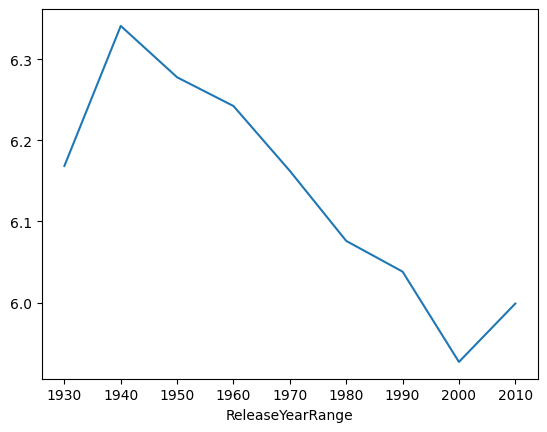

In [23]:
f['ReleaseYearRange'] = (f['Movie release date'] // 10) * 10
movies_by_range = f.groupby('ReleaseYearRange')
movies_by_range['averageRating'].mean().plot()

#f_norm = f.groupby(('Movie release date'// 5) * 5).apply(lambda x: x['averageRating'].mean())

#f_norm.plot()




Text(0, 0.5, 'Movie count')

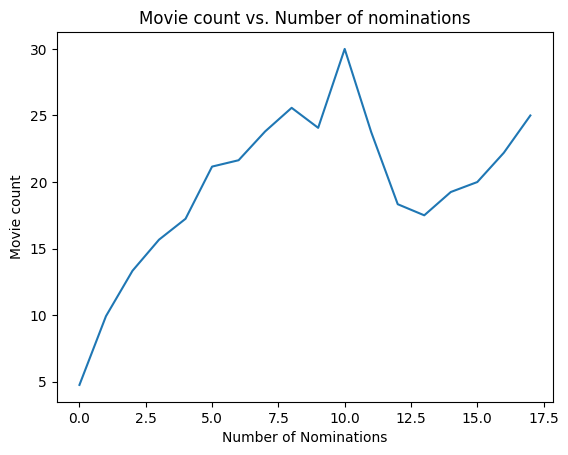

In [24]:
movie_count = actors['Features']['movie_count'].groupby(actors['Features']['nominations']).mean()
plt.plot(movie_count)

plt.title('Movie count vs. Number of nominations')
plt.xlabel('Number of Nominations')
plt.ylabel('Movie count')

Text(0, 0.5, 'Movie count')

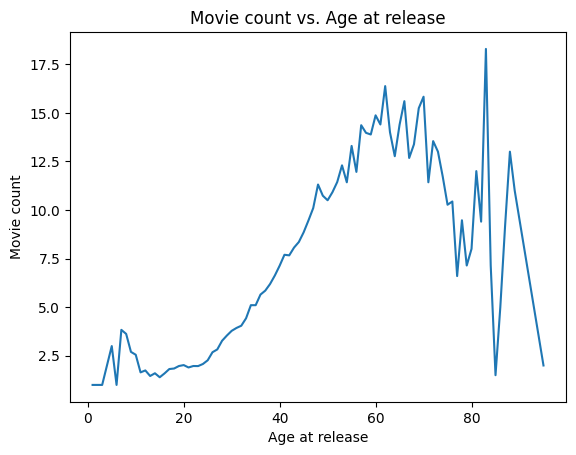

In [25]:
age = actors['Features']['movie_count'].groupby(actors['Features']['age_at_release']).mean()
plt.plot(age)

plt.title('Movie count vs. Age at release')
plt.xlabel('Age at release')
plt.ylabel('Movie count')

In [52]:
#median grade for each year??
#analyse median for each year

median_rating = f['averageRating'].median()
high = f.query('averageRating >= @median_rating')
low = f.query('averageRating < @median_rating')

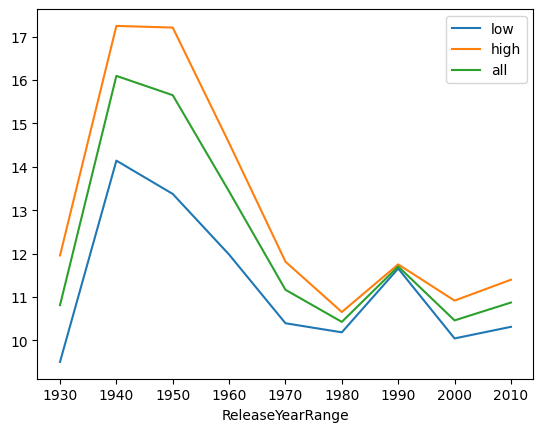

In [27]:
low.groupby('ReleaseYearRange')['genres_b4'].mean().plot()
high.groupby('ReleaseYearRange')['genres_b4'].mean().plot()


f.groupby('ReleaseYearRange')['genres_b4'].mean().plot()
plt.legend(['low', 'high', 'all'])

plt.show()

In [112]:
def do_fancy_ecpi_cute_plot(df, cat, diff,  x, y):
    lo = df.query(f'{diff} < @{cat}')
    hi = df.query(f'{diff} >= @{cat}')
    lo_frame = lo[[x, y]]
    lo_frame['Category'] = 'low'
    hi_frame = hi[[x, y]]
    hi_frame['Category'] = 'high'
    me_frame = df[[x, y]]
    me_frame['Category'] = 'mean'
    frame = pd.concat([lo_frame, hi_frame, me_frame])

    sns.barplot(data=frame, x=x, y=y, hue='Category', errorbar='ci', palette='viridis')
    plt.show()

/tmp/ipykernel_7561/3887168791.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lo_frame['Category'] = 'low'
/tmp/ipykernel_7561/3887168791.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hi_frame['Category'] = 'high'
/tmp/ipykernel_7561/3887168791.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

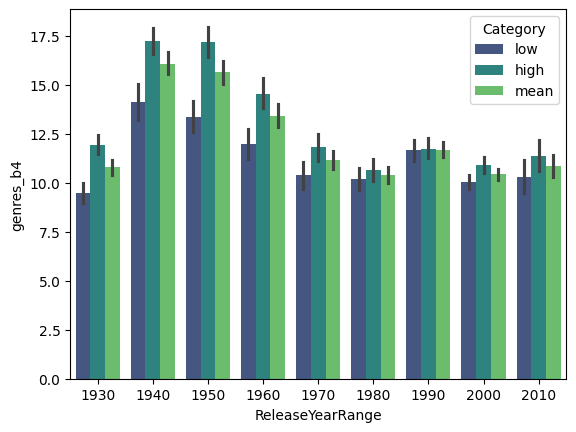

In [113]:
do_fancy_ecpi_cute_plot(f, 'median_rating', 'averageRating', 'ReleaseYearRange', 'genres_b4')

/tmp/ipykernel_7561/3012374605.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lo_frame['Category']='low'
/tmp/ipykernel_7561/3012374605.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hi_frame['Category']='high'
/tmp/ipykernel_7561/3012374605.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

(6.0, 20.0)

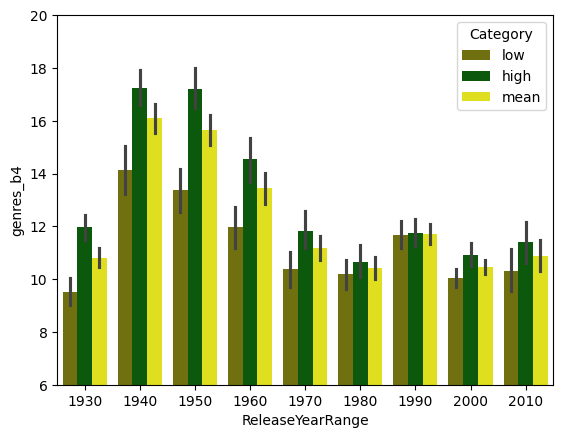

In [88]:
lo_frame = low[['genres_b4', 'ReleaseYearRange']]
lo_frame['Category']='low'
hi_frame = high[['genres_b4', 'ReleaseYearRange']]
hi_frame['Category']='high'
me_frame = f[['genres_b4', 'ReleaseYearRange']]
me_frame['Category']='mean'
fr = pd.concat([lo_frame, hi_frame, me_frame])
sns.barplot(data=fr, x='ReleaseYearRange', y='genres_b4', hue='Category', errorbar='ci', palette={'low':'olive', 'high':'darkgreen', 'mean':'yellow'})
plt.ylim([6, 20])


<BarContainer object of 9 artists>

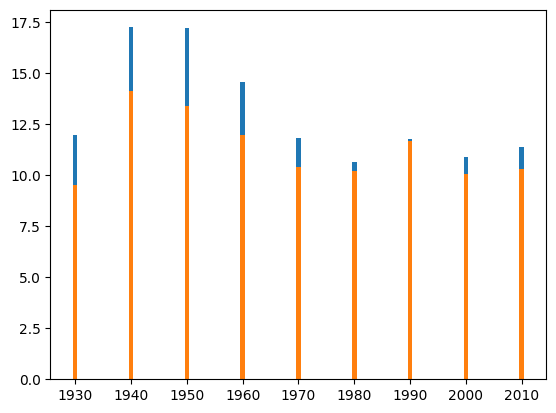

In [29]:


plt.bar(sorted(high['ReleaseYearRange'].unique()), high.groupby('ReleaseYearRange')['genres_b4'].mean())
plt.bar(sorted(low['ReleaseYearRange'].unique()), low.groupby('ReleaseYearRange')['genres_b4'].mean())




<Axes: ylabel='Frequency'>

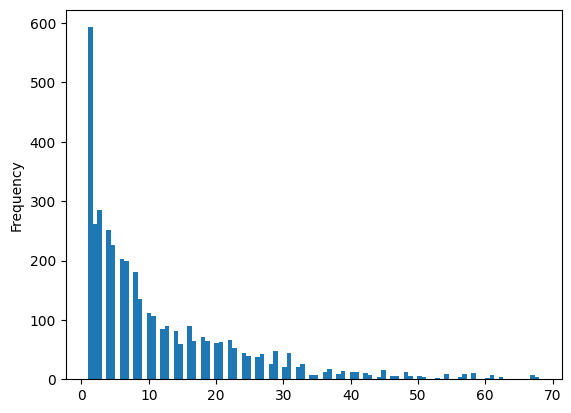

In [30]:
year = f.query('ReleaseYearRange == 1990')
year['genres_b4'].plot.hist(bins=100)
